# **Neural Network Assignment**

**Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs
from traditional machine learning.**

**Answer -** Deep Learning is a branch of machine learning that uses artificial neural networks with many layers to learn patterns from data automatically.

**Evolution:**

In the 1950s, the idea of neural networks started with the perceptron model.

In the 1980s, backpropagation was developed, which allowed networks to learn from errors.

In the 2000s and 2010s, with more data, faster computers, and GPUs, deep learning became powerful and started beating traditional machine learning in areas like image and speech recognition.

**Difference from Traditional Machine Learning:**

Traditional ML needs manual feature extraction. The programmer decides which features to use.

Deep Learning automatically learns features from raw data using multiple layers.

Deep learning works better with large datasets and complex problems (like vision, audio, and language).

Traditional ML works better with small data and simpler tasks.

**Question 2: Explain the basic architecture and functioning of a Perceptron. What are its
limitations?**

**Answer -** A Perceptron is the simplest type of artificial neural network — basically a single neuron that makes decisions.

**Architecture:**


It has inputs (x₁, x₂, …, xn).


Each input has a weight (w₁, w₂, …, wn).


It adds up all the inputs multiplied by their weights and adds a bias.


Then it passes the result through an activation function (usually a step function) to produce the output.


**How it works:**


Multiply each input by its weight.


Add them all together and add the bias.


If the result is greater than a threshold, output = 1; otherwise, output = 0.


During training, it adjusts the weights to reduce errors.


**Limitations:**


Can only solve linearly separable problems (like AND, OR).


Cannot solve complex problems like XOR.


It does not have hidden layers, so it cannot learn non-linear patterns.



**Question 3: Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.**


**Answer -**The activation function decides whether a neuron should be active or not.
It adds non-linearity to the network, helping it learn complex patterns instead of just straight lines.
Without activation functions, a neural network would behave like simple linear regression.

**1. Sigmoid Function**

Output range: 0 to 1

Good for probabilities

Problem: causes vanishing gradient, meaning learning becomes very slow in deep networks.

**2. Tanh Function**

Output range: -1 to 1

Zero-centered (better than sigmoid)

Still suffers from vanishing gradient for large values.

**3. ReLU (Rectified Linear Unit)**

Output = 0 if input < 0, else output = input

Works fast and reduces vanishing gradient problem

Main issue: Dead neurons — some neurons stop learning if inputs are always negative.

**Question 4: What is the difference between Loss function and Cost function in neural
networks? Provide examples.**


**Answer -** Loss function and Cost function both measure how wrong a model’s predictions are, but they are used slightly differently.

**Loss Function:**

It measures the error for one training example.

Example: If you predict one image’s label and it’s wrong, the loss tells how wrong it was.

Example :

Mean Squared Error (MSE) for regression

Cross-Entropy Loss for classification

**Cost Function:**

It is the average of all losses over the whole training dataset.

It gives one overall number that the model tries to minimize.

**Question 5: What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.**


**Answer -** Optimizers help a neural network update its weights to reduce the error (cost function).
They decide how much and in which direction to change the weights during training.

**1. Gradient Descent**

Updates weights in the direction that reduces error the most.

Simple but can be slow and may get stuck in local minima.

Works well for small datasets.

**2. RMSprop**

Uses the average of recent gradients to adjust the learning rate for each weight.

Helps deal with changing learning rates and works well for non-stationary data (like time series).

**3. Adam (Adaptive Moment Estimation)**

Combines Momentum + RMSprop.

Keeps track of both average of gradients and their squares.

Fast, efficient, and widely used for most deep learning tasks.

**Question 6: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.**


In [1]:
import numpy as np

# AND gate inputs and outputs
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1

# Activation function (step)
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
for epoch in range(10):  # 10 iterations
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)
        error = y[i] - y_pred
        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Testing
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f"Input: {X[i]} → Output: {y_pred}")


Input: [0 0] → Output: 0
Input: [0 1] → Output: 0
Input: [1 0] → Output: 0
Input: [1 1] → Output: 1


**Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib**

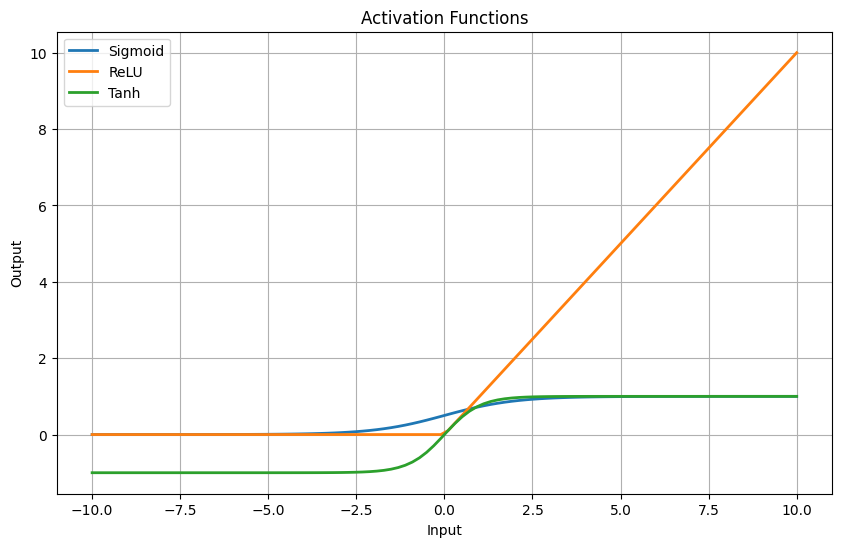

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create input values
x = np.linspace(-10, 10, 100)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Calculate outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot all three functions
plt.figure(figsize=(10, 6))

plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2)
plt.plot(x, y_relu, label='ReLU', linewidth=2)
plt.plot(x, y_tanh, label='Tanh', linewidth=2)

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


**Question 8: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.**

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 2D images to 1D
    Dense(128, activation='relu'),       # Hidden layer
    Dense(10, activation='softmax')      # Output layer (10 digits)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Print training accuracy
train_acc = history.history['accuracy'][-1]
print("Training Accuracy:", round(train_acc * 100, 2), "%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8800 - loss: 0.4273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9660 - loss: 0.1187
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0762
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9833 - loss: 0.0545
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0412
Training Accuracy: 98.62 %


**Question 9: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.**


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7674 - loss: 0.6642 - val_accuracy: 0.8502 - val_loss: 0.4224
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8567 - loss: 0.4017 - val_accuracy: 0.8583 - val_loss: 0.3965
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8732 - loss: 0.3511 - val_accuracy: 0.8642 - val_loss: 0.3799
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8779 - loss: 0.3277 - val_accuracy: 0.8677 - val_loss: 0.3657
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8897 - loss: 0.2995 - val_accuracy: 0.8786 - val_loss: 0.3316


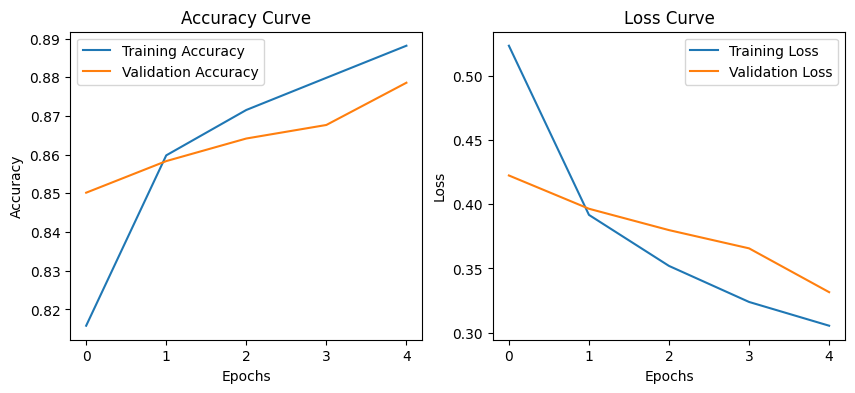

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?**

**Answer -** **1) Model design (perceptron or multilayer NN?)**
Use a multilayer neural network (not a single perceptron). For structured transactional data, a typical simple architecture:

Inputs: numeric features (amount, time gaps, etc.) and categorical features (merchant ID, customer location, device).

Preprocess categoricals with embeddings (small vectors per ID) or one-hot if few categories.

Normalize numeric inputs (standardize or log scale for amount).

A few dense layers (example: 2–4 layers with 64 → 32 → 16 units).

Use BatchNorm + ReLU after each hidden layer and Dropout before the output.

Final layer: 1 neuron + Sigmoid (outputs fraud probability).

Reason: embeddings capture ID relationships, multiple layers capture nonlinearity, final sigmoid gives probability for binary classification.

**2) Activation & loss functions**

Hidden layers: ReLU (simple, fast, combats vanishing gradients).

Output: Sigmoid (probability between 0 and 1).

Loss: Binary Cross-Entropy normally.

If imbalance is extreme or false negatives are very costly, use Focal Loss or weighted binary cross-entropy (give higher weight to fraud class).

Why: BCE is standard for binary. Focal or class weights focus learning on rare fraud examples.

**3) Training and evaluation with class imbalance
Training**

Use class weights in the loss or oversample fraud (SMOTE or simple oversampling). Class weights are simpler and safer for real transactions.

Train on time-ordered splits (train on past, validate on later data) to avoid leakage.

Use stratified validation where possible but preserve time order for real-time systems.

Evaluation (important metrics):

Precision, Recall (Sensitivity) — recall (catching fraud) is usually business-critical.

F1-score if you want balance between precision & recall.

PR-AUC (Precision-Recall AUC) is more informative than ROC-AUC when classes are imbalanced.

Track confusion matrix at selected threshold and precision at fixed recall (e.g., precision when recall = 0.8).

Use calibration (e.g., isotonic or Platt) if you need well-calibrated probabilities.

Cross-validation:

Use time-series (rolling) validation or blocked k-fold (no mixing older training with newer test samples) to reflect production behavior.

**4) Optimizer and overfitting prevention
Optimizer:**

Adam — fast, robust, works well out of the box. Optionally tune learning rate and weight decay.

Prevent overfitting:

Early stopping on validation metric (stop when val PR-AUC stops improving).

Dropout (e.g., 0.2–0.5) in dense layers.

L2 weight decay (regularization).

Keep network small enough for the data size.

BatchNorm helps stability and generalization.

Use data-level techniques: realistic oversampling, not leaking future info.

Monitor model complexity vs. validation performance and reduce layers/units if overfitting persists.

**5) Real-time / production considerations**

Feature pipeline: build a feature store or fast feature service that returns features within latency limits. Cache features where safe.

Inference speed: prefer small models, quantization, or distilled models if latency matters.

Threshold tuning: pick a probability threshold based on cost (cost of false negative vs false positive).

Monitoring: track live metrics (fraud rate, model score distribution, precision/recall on flagged cases), data drift, and label delay.

Retraining: schedule regular retrains or trigger retrain on drift; use incremental learning if possible.

Explainability: log feature importances or use SHAP for suspicious decisions to help analysts.

Human-in-the-loop: send high-risk transactions for manual review; use their labels to improve model.

**6) Practical checklist (short)**

Normalize amounts, encode IDs with embeddings, handle missing values.

Use multilayer NN with ReLU + BatchNorm + Dropout, sigmoid output.

Loss = weighted BCE or focal loss.

Optimizer = Adam + weight decay.

Handle imbalance with class weights or careful oversampling.

Evaluate with PR-AUC, precision/recall, and business cost metrics.

Prevent overfitting with early stopping, dropout, L2, and smaller model.

Deploy with monitoring, thresholding, and retraining pipelines.